# Welcome to Astroid Threat Classification
#### By Adithya Viswanathan

How to run the notebook:


1.   Import dataset (orbits - orbits.csv) into files section on left-hand side
2.   Go to Runtime, and click Run All
3.   Wait until it all runs (5-10 minutes)
4.   Go to View, and click Expand All Sections
5.   Enjoy!



# Data Preparation

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#https://www.kaggle.com/shrushtijoshi/asteroid-impacts
data = pd.read_csv("orbits - orbits.csv")
numerical_data = data.drop(['Object Name','Hazardous'], axis=1)
data.head()

,Object Name,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Minimum Orbit Intersection Distance (AU),Orbital Reference,Asteroid Magnitude,Classification,Hazardous
0,433 Eros,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,0.1492,598,11.16,Amor Asteroid,False
1,719 Albert,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,0.2004,78,15.50,Amor Asteroid,False
2,887 Alinda,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,0.0925,188,13.40,Amor Asteroid,False
3,1036 Ganymed,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,0.3421,597,9.45,Amor Asteroid,False
4,1221 Amor,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,0.1068,70,17.70,Amor Asteroid,False


In [ ]:
data = data.drop(['Minimum Orbit Intersection Distance (AU)','Asteroid Magnitude'],axis=1)
data.replace(["Amor Asteroid", "Apollo Asteroid", "Aten Asteroid", "Apohele Asteroid"], [1, 2, 3, 4], inplace = True)
data.head()

,Object Name,Epoch (TDB),Orbit Axis (AU),Orbit Eccentricity,Orbit Inclination (deg),Perihelion Argument (deg),Node Longitude (deg),Mean Anomoly (deg),Perihelion Distance (AU),Aphelion Distance (AU),Orbital Period (yr),Orbital Reference,Classification,Hazardous
0,433 Eros,57800,1.4579,0.2226,10.8277,178.8050,304.3265,319.3111,1.1335,1.78,1.76,598,1,False
1,719 Albert,57800,2.6385,0.5479,11.5822,156.1409,183.9204,224.5535,1.1928,4.08,4.29,78,1,False
2,887 Alinda,57800,2.4787,0.5671,9.3561,350.3482,110.5444,351.3730,1.0731,3.88,3.90,188,1,False
3,1036 Ganymed,57800,2.6628,0.5338,26.6929,132.4690,215.5551,92.5640,1.2413,4.08,4.35,597,1,False
4,1221 Amor,57800,1.9191,0.4356,11.8795,26.6572,171.3448,313.7379,1.0832,2.76,2.66,70,1,False


In [ ]:
print("Number of Rows:", data.shape[0])
print("Number of Columns", data.shape[1])
data = data.dropna()
print(data.isnull().sum())

Number of Rows: 15635
Number of Columns 14
Object Name                  0
Epoch (TDB)                  0
Orbit Axis (AU)              0
Orbit Eccentricity           0
Orbit Inclination (deg)      0
Perihelion Argument (deg)    0
Node Longitude (deg)         0
Mean Anomoly (deg)           0
Perihelion Distance (AU)     0
Aphelion Distance (AU)       0
Orbital Period (yr)          0
Orbital Reference            0
Classification               0
Hazardous                    0
dtype: int64


# Data Analysis

In [ ]:
data['Hazardous'].value_counts()

False    13855
True      1779
Name: Hazardous, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


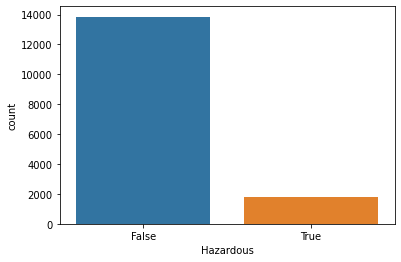

In [ ]:
sns.countplot(data['Hazardous'])

[Text(68.99999999999999, 0.5, 'Asteroid Details\t'),
 Text(0.5, 69.0, '\nAsteroid Details'),
 Text(0.5, 1.0, 'Correlation matrix of Asteroid data\n')]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


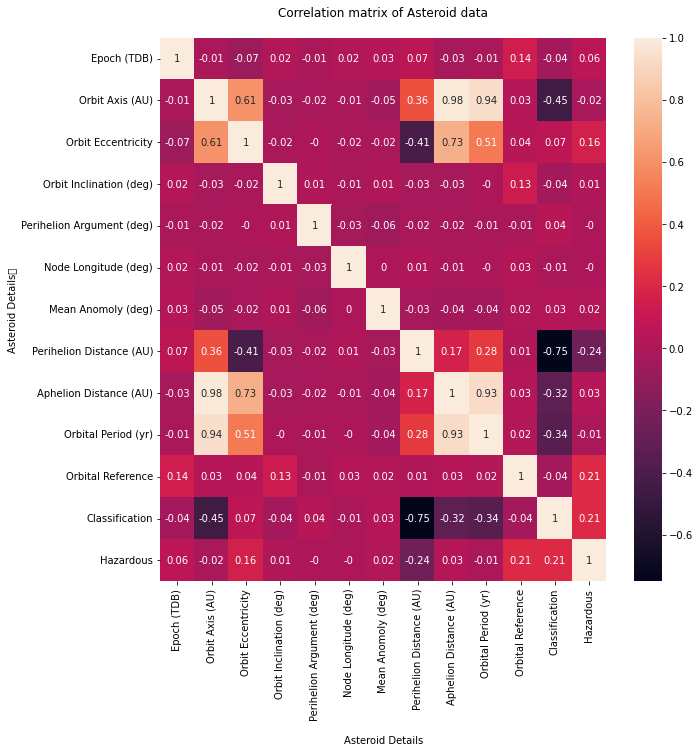

In [ ]:
#https://www.stackvidhya.com/plot-correlation-matrix-in-pandas-python/
correlation_matrix = data.corr().round(2)
plt.figure(figsize=(10,10))
hm = sns.heatmap(data=correlation_matrix, annot=True)
hm.set(xlabel='\nAsteroid Details', ylabel='Asteroid Details\t', title = "Correlation matrix of Asteroid data\n")

In [ ]:
#https://stackoverflow.com/questions/29276301/max-and-min-value-for-each-colum-of-one-dataframe
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])


ranges = numerical_data.apply(minMax).T.values.tolist()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


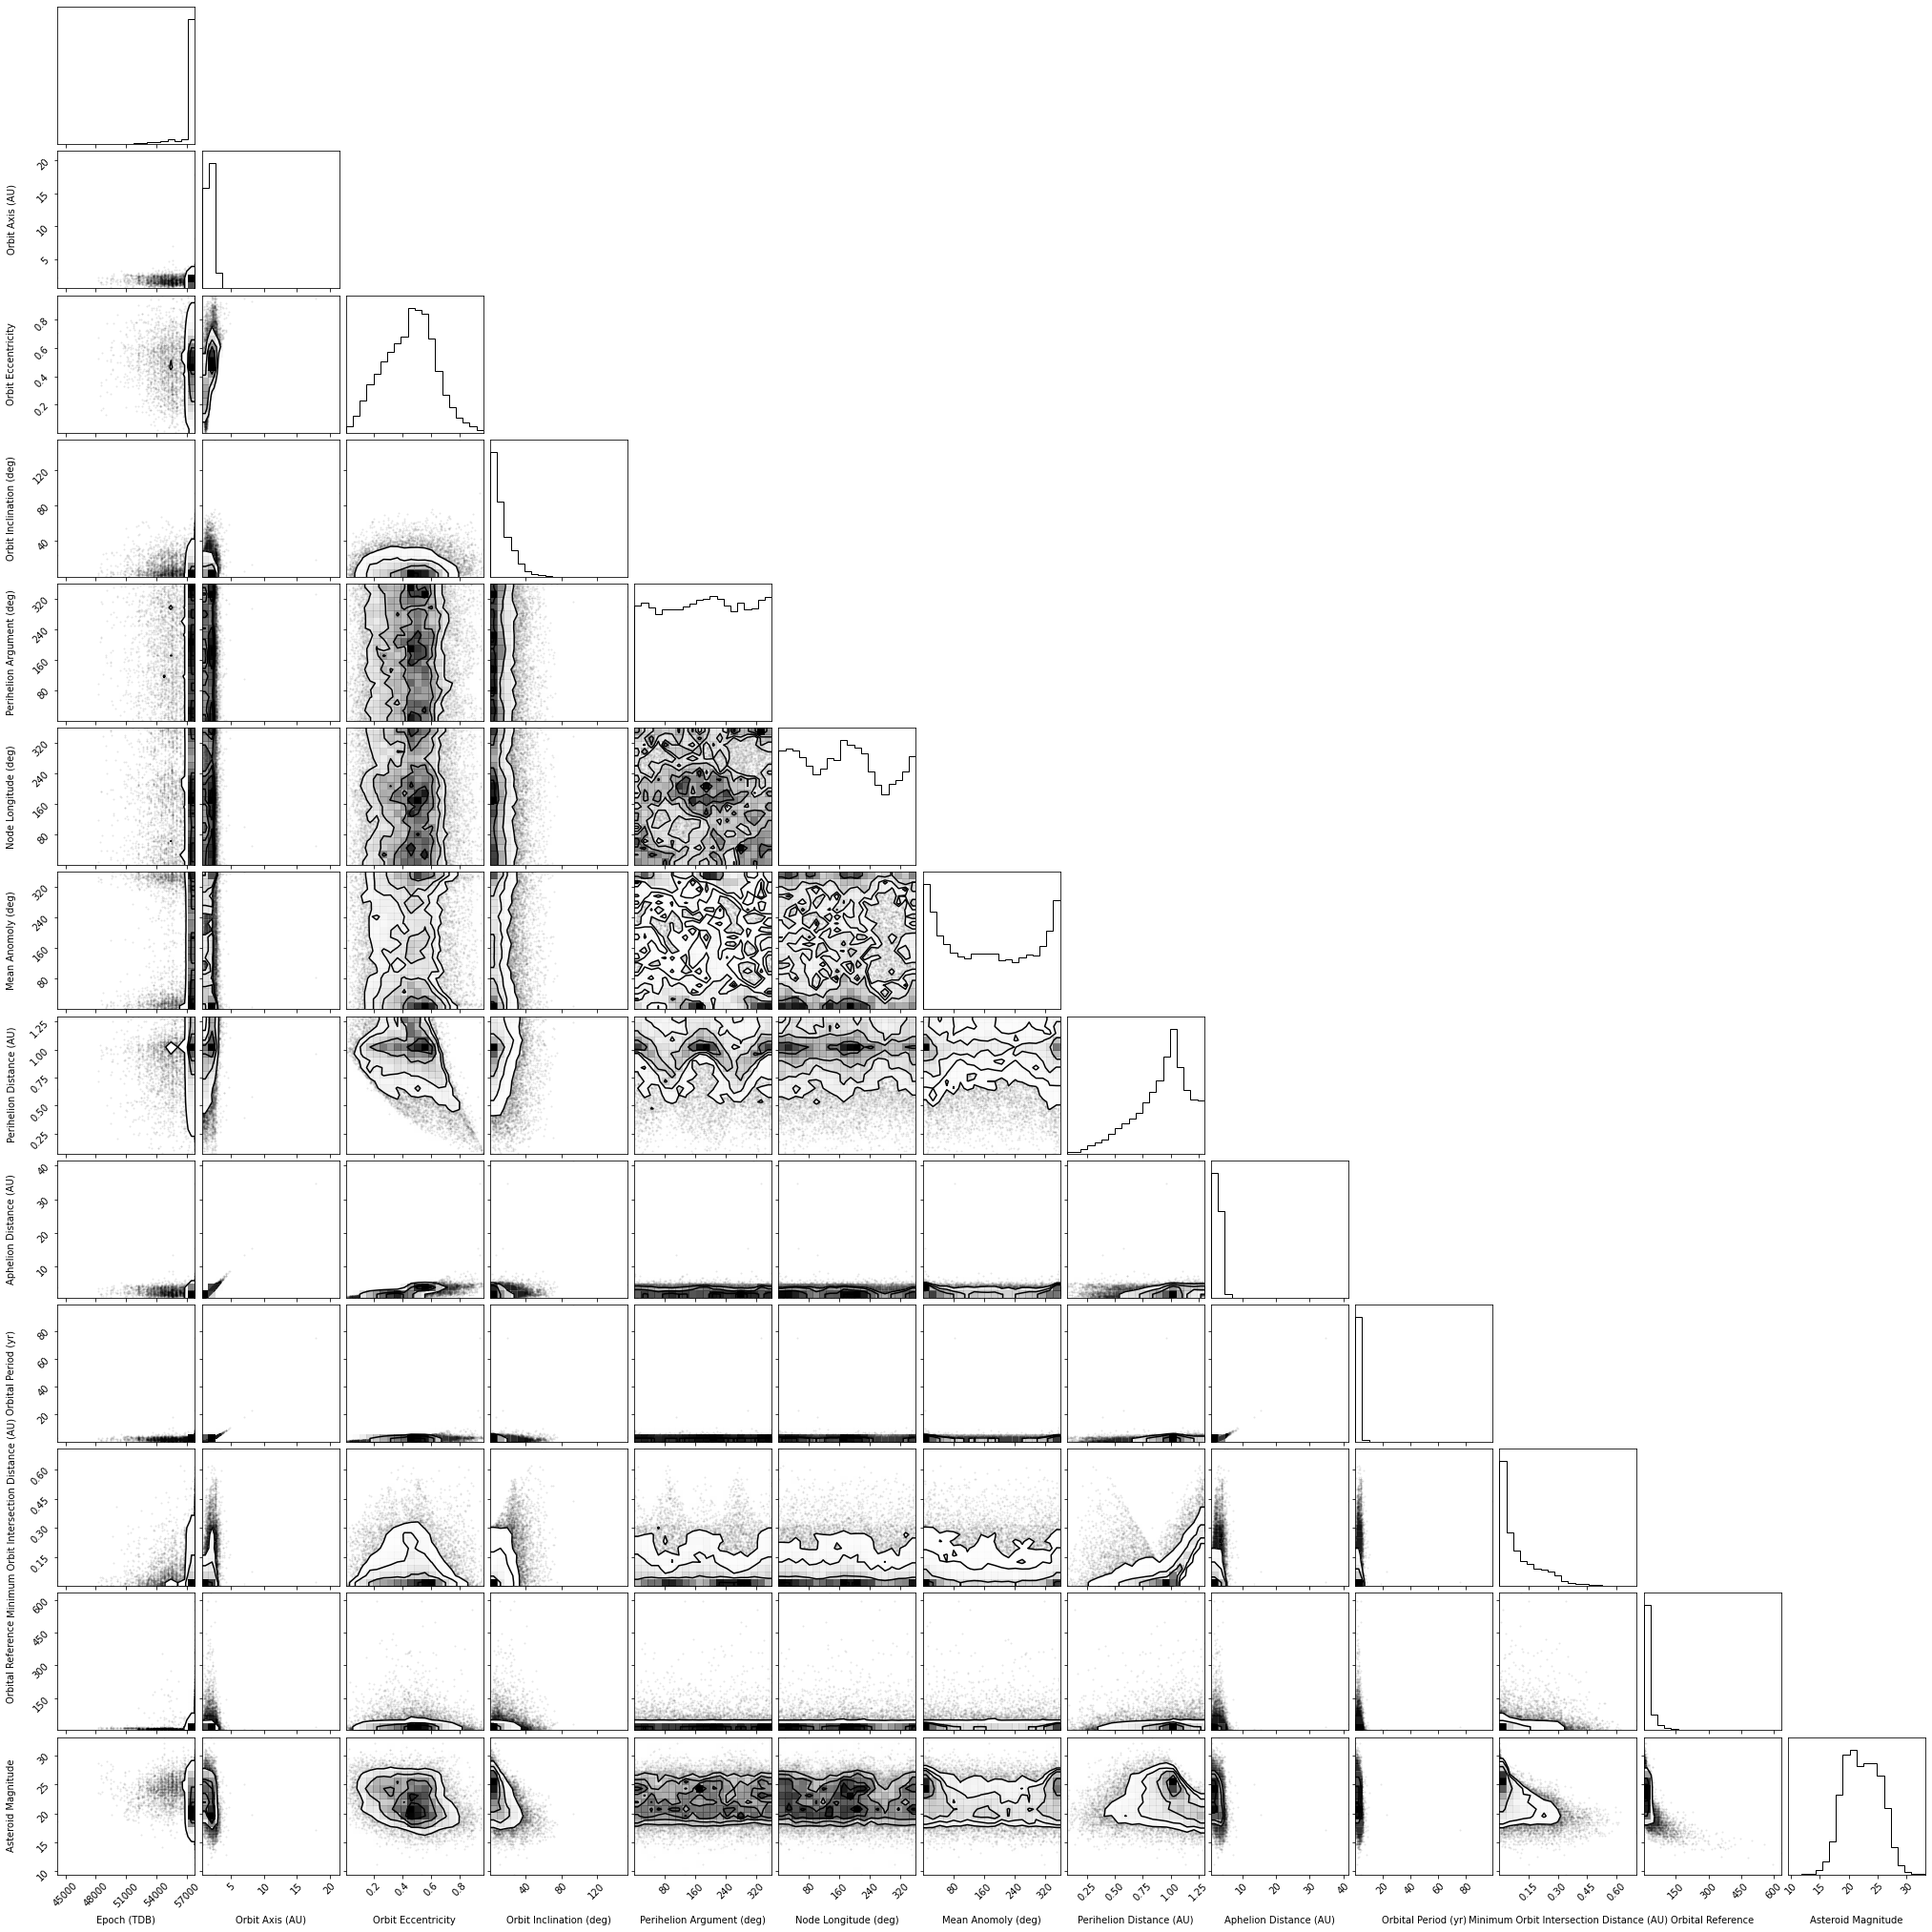

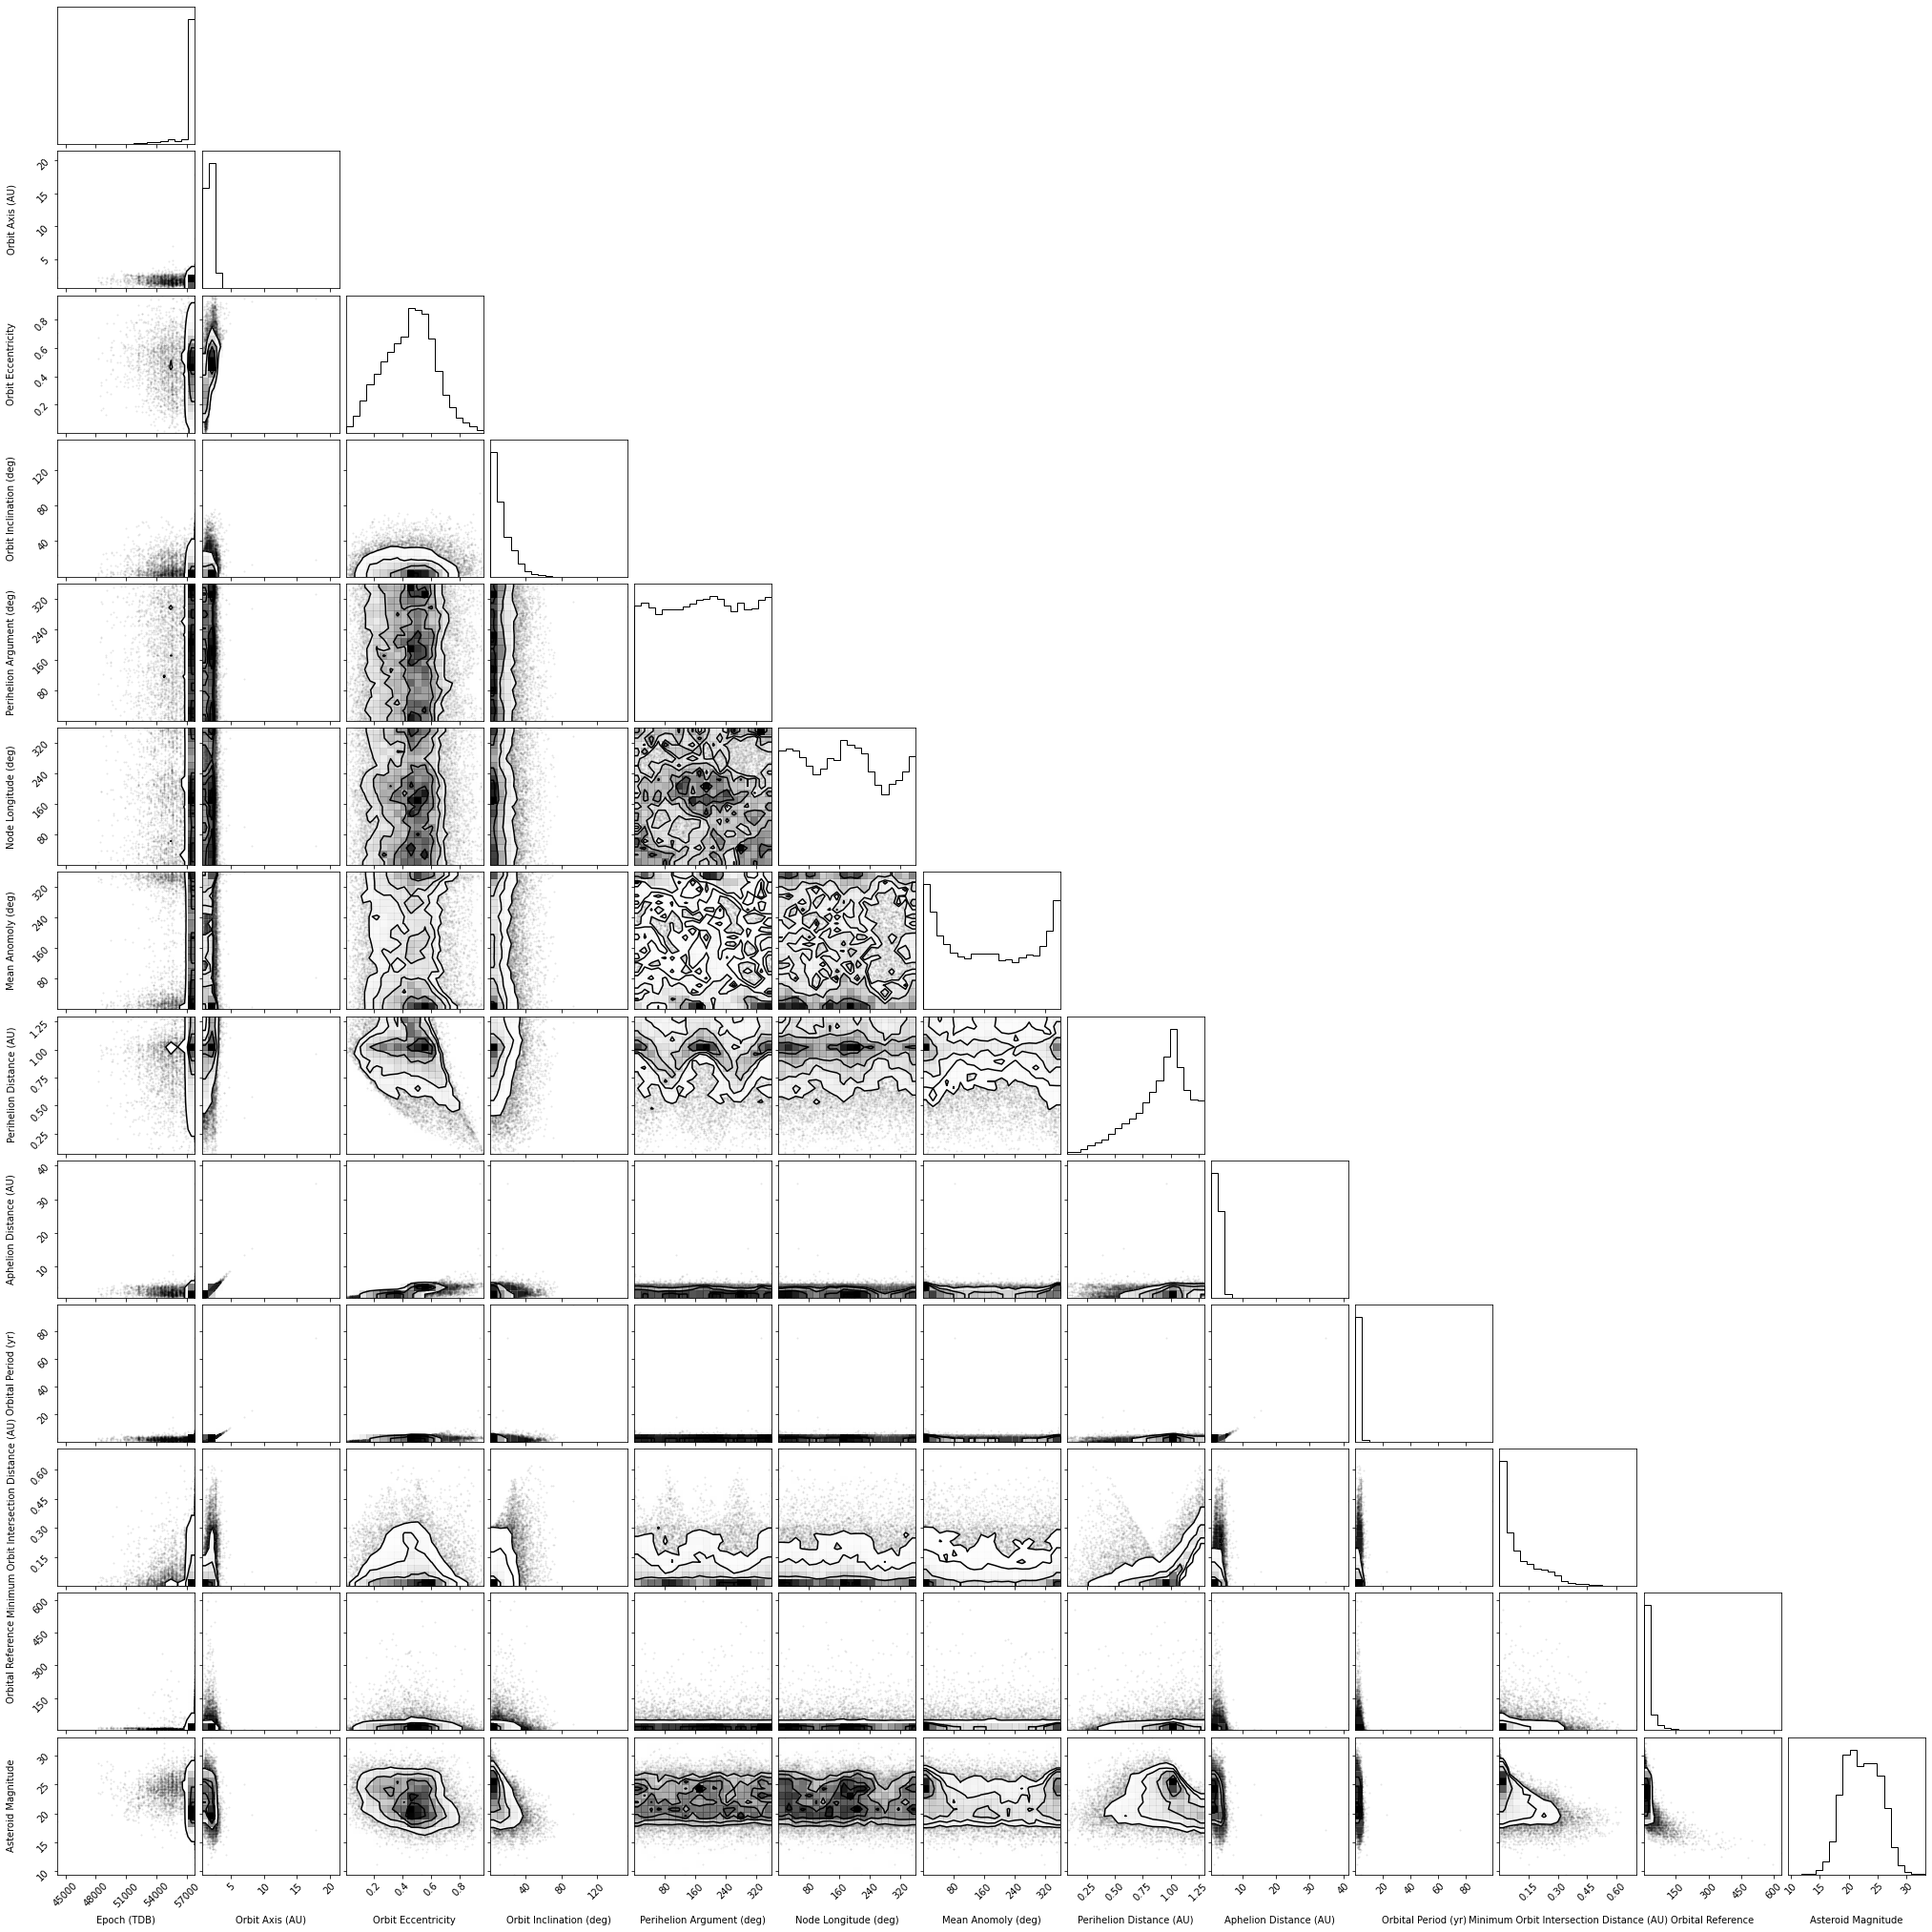

In [ ]:
#https://github.com/kpenev/poet_ic_solver/blob/master/corner_plot.py
%pip install corner
import corner
corner.corner(numerical_data,range=ranges,labels=numerical_data.columns)

In [ ]:
correlation_matrix['Hazardous'].sort_values()

Perihelion Distance (AU)    -0.24
Orbit Axis (AU)             -0.02
Orbital Period (yr)         -0.01
Perihelion Argument (deg)   -0.00
Node Longitude (deg)        -0.00
Orbit Inclination (deg)      0.01
Mean Anomoly (deg)           0.02
Aphelion Distance (AU)       0.03
Epoch (TDB)                  0.06
Orbit Eccentricity           0.16
Orbital Reference            0.21
Classification               0.21
Hazardous                    1.00
Name: Hazardous, dtype: float64

In [ ]:
#most_correlated_features = data[['Minimum Orbit Intersection Distance (AU)','Asteroid Magnitude', 'Perihelion Distance (AU)', 'Orbit Eccentricity', 'Orbital Reference','Hazardous']]
most_correlated_features = data[['Perihelion Distance (AU)', 'Epoch (TDB)', 'Orbit Eccentricity', 'Orbital Reference','Classification','Hazardous']]
#most_correlated_features = data.drop(['Object Name'],axis=1)
most_correlated_features.head()

,Perihelion Distance (AU),Epoch (TDB),Orbit Eccentricity,Orbital Reference,Classification,Hazardous
0,1.1335,57800,0.2226,598,1,False
1,1.1928,57800,0.5479,78,1,False
2,1.0731,57800,0.5671,188,1,False
3,1.2413,57800,0.5338,597,1,False
4,1.0832,57800,0.4356,70,1,False


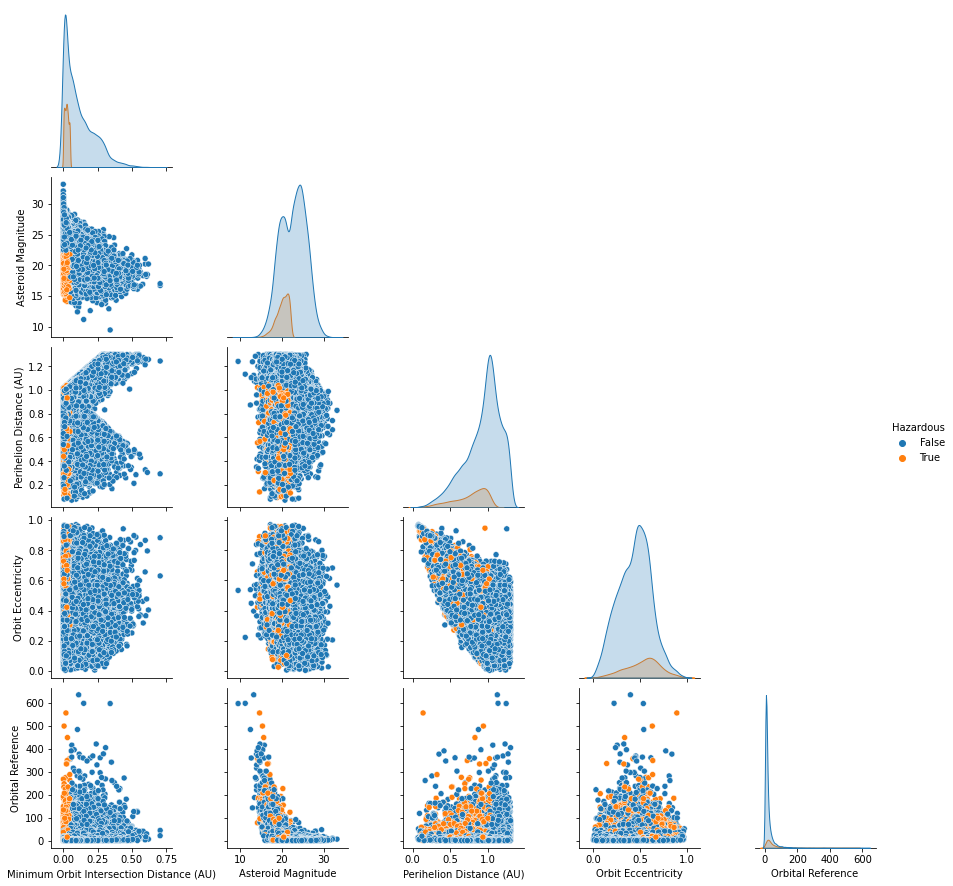

In [ ]:
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
#plotting the most correlated features
sns.pairplot(most_correlated_features, hue="Hazardous", corner=True)

In [ ]:
#https://www.tutorialspoint.com/python_data_science/python_measuring_central_tendency.htm
print("MEAN")
print(most_correlated_features.drop(["Hazardous"], axis=1).mean())

print("\nMEDIAN")
print(most_correlated_features.drop(["Hazardous"], axis=1).median())

MEAN
Perihelion Distance (AU)        0.914912
Epoch (TDB)                 57365.394947
Orbit Eccentricity              0.449694
Orbital Reference              21.885257
Classification                  1.690246
dtype: float64

MEDIAN
Perihelion Distance (AU)        0.9658
Epoch (TDB)                 57800.0000
Orbit Eccentricity              0.4629
Orbital Reference              11.0000
Classification                  2.0000
dtype: float64


In [ ]:
#https://www.tutorialspoint.com/python_data_science/python_measuring_variance.htm
print("Standard Deviation")
print(most_correlated_features.drop(['Hazardous'], axis=1).std())

print("\nSKEW")
print(most_correlated_features.drop(['Hazardous'], axis=1).skew())

Standard Deviation
Perihelion Distance (AU)       0.240309
Epoch (TDB)                 1167.238040
Orbit Eccentricity             0.176000
Orbital Reference             33.632091
Classification                 0.605023
dtype: float64

SKEW
Perihelion Distance (AU)   -0.759292
Epoch (TDB)                -3.350695
Orbit Eccentricity         -0.040404
Orbital Reference           5.710189
Classification              0.299163
dtype: float64


The distribution of MOID is skewed to the right since its skew value is more than 1. The other features' skew is between -1 and 1, so they are symmetric.

# Data Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

x = most_correlated_features.drop(['Hazardous'], axis=1)
y = data["Hazardous"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=12)
table = []
table.append(['Model','Accuracy','Precision','Recall'])

In [ ]:
#https://colab.research.google.com/drive/1coQx_fGMyiOhli6xjETUaXfy3AX1PqWX
from sklearn.preprocessing import StandardScaler
scaler = preprocessing.StandardScaler().fit(x_train)
d = preprocessing.normalize(x_train)
x_train_norm = pd.DataFrame(d, columns=x_train.columns)
x_train_norm.head()

scaler2 = preprocessing.StandardScaler().fit(x_test)
d2 = preprocessing.normalize(x_test)
x_test_norm = pd.DataFrame(d2, columns=x_test.columns)
x_test_norm.head()

#x_train_norm = scaler.transform(x_train)
#x_test_norm = scaler.transform(x_test)

,Perihelion Distance (AU),Epoch (TDB),Orbit Eccentricity,Orbital Reference,Classification
0,0.000015,1.0,0.000005,0.000623,0.000035
1,0.000014,1.0,0.000012,0.000225,0.000035
2,0.000009,1.0,0.000011,0.000675,0.000035
3,0.000018,1.0,0.000009,0.000173,0.000017
4,0.000017,1.0,0.000002,0.000104,0.000035


# Model Fitting

##K-Nearest Neighbors

### K-Nearest Neighbors (Without Normalization)

In [ ]:
len(x_test)

3127

In [ ]:
#Import knearest neighbors Classifier model. K = 1
from sklearn.neighbors import KNeighborsClassifier
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

def knn(x_train, K):
  #Create KNN Classifier
  knn = KNeighborsClassifier(n_neighbors=K)

  #Train the model using the training sets
  knn.fit(x_train, y_train)

  #Predict the response for test dataset
  y_pred = knn.predict(x_test)
  y_pred_train = knn.predict(x_train)

  # Model Accuracy, how often is the classifier correct?
  train_acc = metrics.accuracy_score(y_train, y_pred_train)
  test_acc = metrics.accuracy_score(y_test, y_pred)
  #print("Train Accuracy:")
  #print("Test Accuracy:")
  return train_acc,test_acc

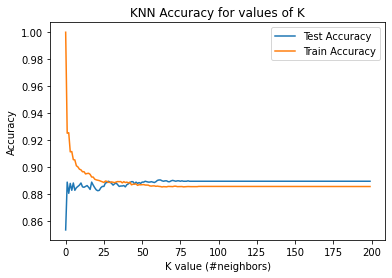

In [ ]:
all_acc_test = []
all_acc_train = []
max_acc = 0
k = 0
for i in range(1,201):
  curr_acc_train,curr_acc_test = knn(x_train,i)
  all_acc_test.append(curr_acc_test)
  all_acc_train.append(curr_acc_train)
  if(curr_acc_test > max_acc):
    max_acc = curr_acc_test
    k=i
#print("K =", i, "\nAccuracy:", max_acc)
plt.title("KNN Accuracy for values of K")
plt.plot(all_acc_test, label = 'Test Accuracy')
plt.plot(all_acc_train, label = 'Train Accuracy')
plt.xlabel("K value (#neighbors)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

For small values of K, the model is overfiting since the difference between train and test accuracy is greater compared to higher values of K. Also, higher K values seem to generalize better.

### K-Nearest Neighbors (With Normalization)

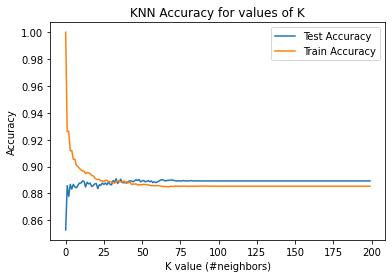

In [ ]:
all_acc_test_norm = []
all_acc_train_norm = []
max_acc = 0
k = 0
for i in range(1,201):
  curr_acc_train,curr_acc_test = knn(x_train_norm,i)
  all_acc_test_norm.append(curr_acc_test)
  all_acc_train_norm.append(curr_acc_train)
  if(curr_acc_test > max_acc):
    max_acc = curr_acc_test
    k=i
#print("K =", i, "\nAccuracy:", max_acc)
plt.title("KNN Accuracy for values of K")
plt.plot(all_acc_test_norm, label = 'Test Accuracy')
plt.plot(all_acc_train_norm, label = 'Train Accuracy')
plt.xlabel("K value (#neighbors)")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Conclusion: Normalization did not have a drastic effect on the accuracy of K-Nearest Neighbors.

### K-Nearest Neighbors Summary

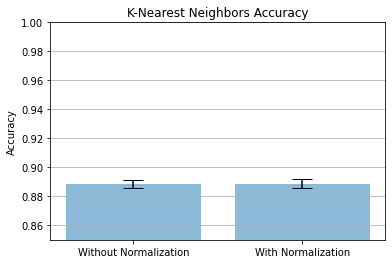

In [ ]:
#all_acc_test
#all_acc_test_norm
test_mean = np.mean(all_acc_test)
test_norm_mean = np.mean(all_acc_test_norm)
test_std = np.std(all_acc_test)
test_norm_std = np.std(all_acc_test_norm)
values = [test_mean, test_norm_mean]
errors = [test_std, test_norm_std]
fig, ax = plt.subplots()

ax.bar(np.arange(2), values, yerr=errors, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Accuracy')
ax.set_xticks(np.arange(2))
ax.set_xticklabels(['Without Normalization', 'With Normalization'])
ax.set_title('K-Nearest Neighbors Accuracy')
ax.yaxis.grid(True)

# Save the figure and show
#plt.tight_layout()
plt.ylim(.85, 1)
plt.show()

Optimum K-value = 50-75

[[2718   63]
 [ 293   53]]


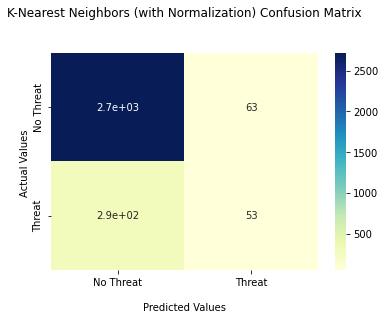

Accuracy: 0.886
Precision: 0.457
Recall: 0.153


In [ ]:
knn = KNeighborsClassifier(n_neighbors=10)

#Train the model using the training sets
knn.fit(x_train_norm, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test_norm)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='YlGnBu')

ax.set_title('K-Nearest Neighbors (with Normalization) Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No Threat','Threat'])
ax.yaxis.set_ticklabels(['No Threat','Threat'])
plt.show()
accuracy = round(metrics.accuracy_score(y_test, y_pred),3)
precision = round(metrics.precision_score(y_test, y_pred),3)
recall = round(metrics.recall_score(y_test, y_pred),3)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
table.append(['K-Nearest Neighbors (with normalization)',accuracy,precision,recall])

[[2776    5]
 [ 342    4]]


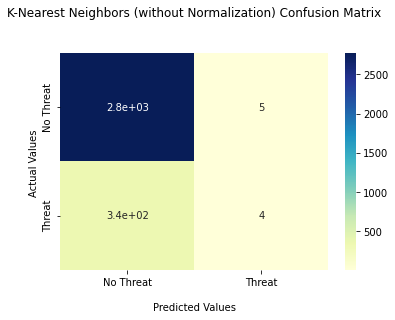

Accuracy: 0.889
Precision: 0.444
Recall: 0.012


In [ ]:
knn = KNeighborsClassifier(n_neighbors=60)

#Train the model using the training sets
knn.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='YlGnBu')

ax.set_title('K-Nearest Neighbors (without Normalization) Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No Threat','Threat'])
ax.yaxis.set_ticklabels(['No Threat','Threat'])
plt.show()
accuracy = round(metrics.accuracy_score(y_test, y_pred),3)
precision = round(metrics.precision_score(y_test, y_pred),3)
recall = round(metrics.recall_score(y_test, y_pred),3)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
table.append(['K-Nearest Neighbors (without normalization)',accuracy,precision,recall])

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
def decision_tree(x_train, depth):
  dtree = DecisionTreeClassifier(criterion="gini", random_state=12,max_depth=depth, min_samples_leaf=50)
  dtree.fit(x_train,y_train)
  return dtree

In [ ]:
from sklearn.metrics import accuracy_score
dtree = decision_tree(x_train, 5)
y_predict = dtree.predict(x_test)
accuracy_score(y_test,y_predict)

0.8896706108090822

In [ ]:
from sklearn import tree
tree_final = tree.export_text(dtree)
print(tree_final)


|--- feature_3 <= 17.50
|   |--- feature_2 <= 0.64
|   |   |--- feature_0 <= 1.01
|   |   |   |--- feature_3 <= 10.50
|   |   |   |   |--- feature_2 <= 0.28
|   |   |   |   |   |--- class: False
|   |   |   |   |--- feature_2 >  0.28
|   |   |   |   |   |--- class: False
|   |   |   |--- feature_3 >  10.50
|   |   |   |   |--- feature_2 <= 0.46
|   |   |   |   |   |--- class: False
|   |   |   |   |--- feature_2 >  0.46
|   |   |   |   |   |--- class: False
|   |   |--- feature_0 >  1.01
|   |   |   |--- feature_0 <= 1.06
|   |   |   |   |--- feature_3 <= 14.50
|   |   |   |   |   |--- class: False
|   |   |   |   |--- feature_3 >  14.50
|   |   |   |   |   |--- class: False
|   |   |   |--- feature_0 >  1.06
|   |   |   |   |--- class: False
|   |--- feature_2 >  0.64
|   |   |--- feature_3 <= 10.50
|   |   |   |--- feature_0 <= 0.34
|   |   |   |   |--- class: False
|   |   |   |--- feature_0 >  0.34
|   |   |   |   |--- feature_1 <= 57776.50
|   |   |   |   |   |--- class: False
|  

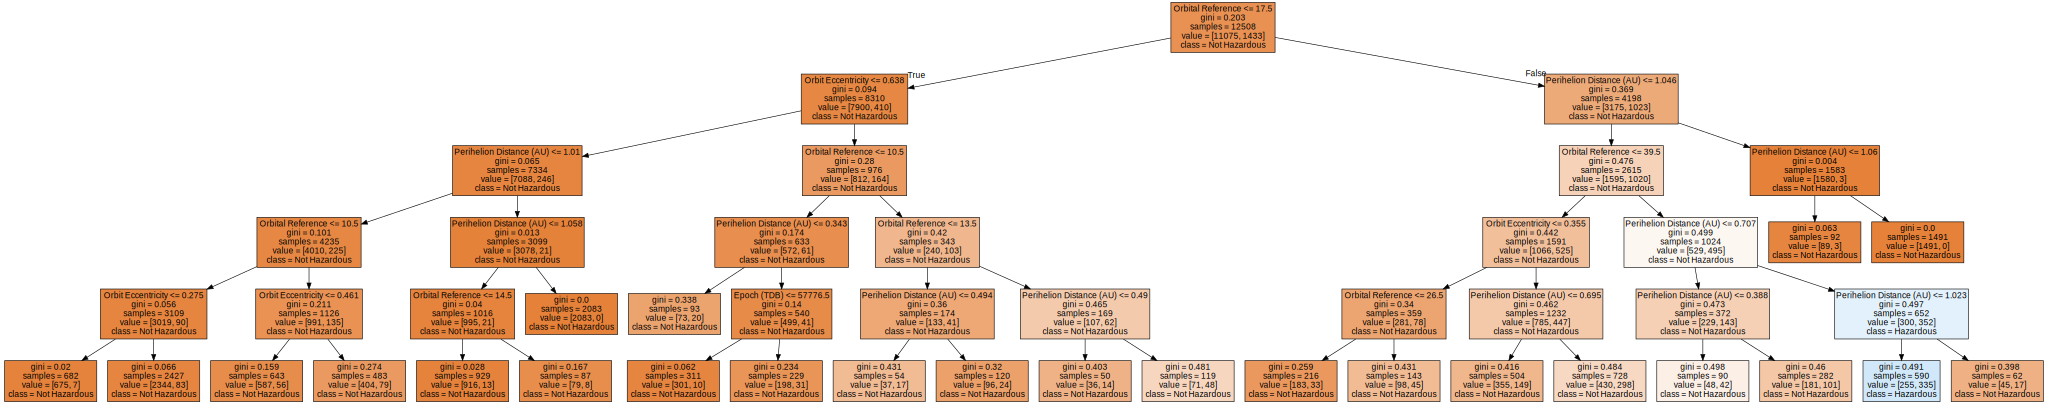

In [ ]:
import graphviz
dot_data = tree.export_graphviz(dtree, out_file=None,
                                feature_names=x_train.columns,
                                class_names=["Not Hazardous","Hazardous"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accuracy = round(metrics.accuracy_score(y_test, y_pred),3)
precision = round(metrics.precision_score(y_test, y_pred),3)
recall = round(metrics.recall_score(y_test, y_pred),3)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
table.append(['Decision Tree',accuracy,precision,recall])

Accuracy: 0.885
Precision: 0.465
Recall: 0.272


## Naive Bayes

[[2640  141]
 [ 276   70]]


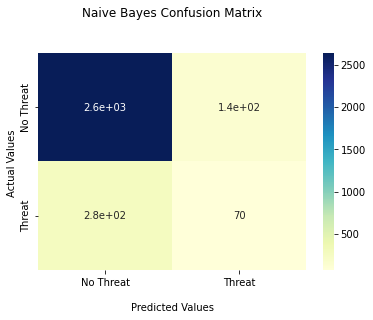

Accuracy: 0.867
Precision: 0.332
Recall: 0.202


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
y_pred = nb.fit(x_train, y_train).predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='YlGnBu')

ax.set_title('Naive Bayes Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No Threat','Threat'])
ax.yaxis.set_ticklabels(['No Threat','Threat'])
plt.show()
accuracy = round(metrics.accuracy_score(y_test, y_pred),3)
precision = round(metrics.precision_score(y_test, y_pred),3)
recall = round(metrics.recall_score(y_test, y_pred),3)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
table.append(['Naive Bayes',accuracy,precision,recall])

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

def logistic_regression(x_train1,x_test1,append):
  logreg = LogisticRegression()
  logreg.fit(x_train1,y_train)
  y_pred=logreg.predict(x_test1)
  cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
  print(cnf_matrix)
  ax = sns.heatmap(cnf_matrix, annot=True, cmap='YlGnBu')

  ax.set_title('Seaborn Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');
  ax.xaxis.set_ticklabels(['No Threat','Threat'])
  ax.yaxis.set_ticklabels(['No Threat','Threat'])
  plt.show()
  accuracy = round(metrics.accuracy_score(y_test, y_pred),3)
  precision = round(metrics.precision_score(y_test, y_pred),3)
  recall = round(metrics.recall_score(y_test, y_pred),3)
  print("Accuracy:",accuracy)
  print("Precision:",precision)
  print("Recall:",recall)
  table.append(['Logistic Regression'+append,accuracy,precision,recall])

  #Recall meaning: If an astroid is a threat, then the model can detect it 53% of the time
  y_pred_proba = logreg.predict_proba(x_test1)[::,1]
  fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
  auc = metrics.roc_auc_score(y_test, y_pred_proba)
  plt.plot(fpr,tpr,label="Test Set,Area Under Curve="+str(auc))
  plt.legend(loc=4)
  plt.show()

[[2767   14]
 [ 342    4]]


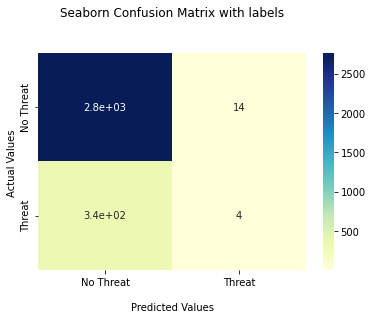

Accuracy: 0.886
Precision: 0.222
Recall: 0.012


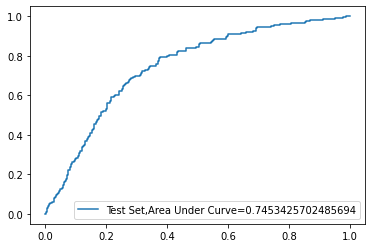

In [ ]:
lr = logistic_regression(x_train,x_test,"(without normalization)")

[[2781    0]
 [ 346    0]]


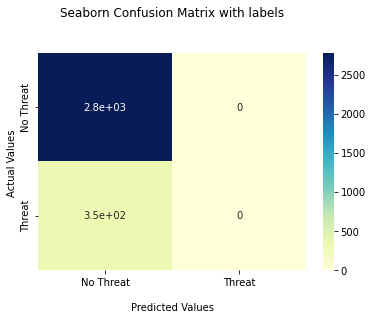

Accuracy: 0.889
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


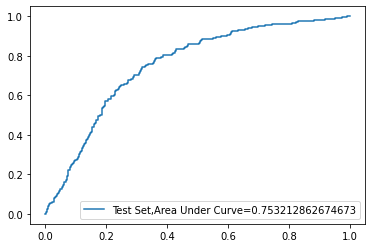

In [ ]:
lr_norm = logistic_regression(x_train_norm,x_test_norm,"(with normalization)")

Conclusion: Normalizing again did not help the accuracy, confusion matrix, and ROC curve in the case of logistic regression. More research has to be done to figure out why this is the case.

## Neural Network

[[2779    2]
 [ 346    0]]


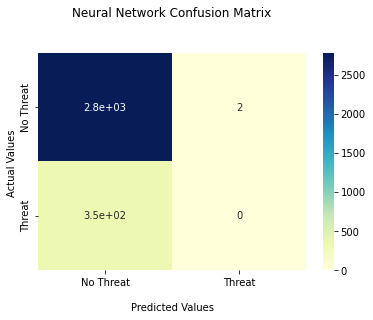

Accuracy: 0.889
Precision: 0.0
Recall: 0.0


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

mlp = MLPClassifier(hidden_layer_sizes=(8), activation='relu', solver='adam', max_iter=200)
mlp.fit(x_train,y_train)
y_pred = mlp.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
ax = sns.heatmap(cnf_matrix, annot=True, cmap='YlGnBu')

ax.set_title('Neural Network Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
ax.xaxis.set_ticklabels(['No Threat','Threat'])
ax.yaxis.set_ticklabels(['No Threat','Threat'])
plt.show()
accuracy = round(metrics.accuracy_score(y_test, y_pred),3)
precision = round(metrics.precision_score(y_test, y_pred),3)
recall = round(metrics.recall_score(y_test, y_pred),3)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)


In [ ]:
table.append(['Neural Network',accuracy,precision,recall])

##Summary

In [ ]:
from tabulate import tabulate
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒═════════════════════════════════════════════╤════════════╤═════════════╤══════════╕
│ Model                                       │   Accuracy │   Precision │   Recall │
╞═════════════════════════════════════════════╪════════════╪═════════════╪══════════╡
│ K-Nearest Neighbors (with normalization)    │      0.886 │       0.457 │    0.153 │
├─────────────────────────────────────────────┼────────────┼─────────────┼──────────┤
│ K-Nearest Neighbors (without normalization) │      0.889 │       0.444 │    0.012 │
├─────────────────────────────────────────────┼────────────┼─────────────┼──────────┤
│ Decision Tree                               │      0.885 │       0.465 │    0.272 │
├─────────────────────────────────────────────┼────────────┼─────────────┼──────────┤
│ Naive Bayes                                 │      0.867 │       0.332 │    0.202 │
├─────────────────────────────────────────────┼────────────┼─────────────┼──────────┤
│ Logistic Regression(without normalization)  │      0